In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imageio import imread, imwrite

%matplotlib inline

train_dir = '~/.kaggle/competitions/whale-categorization-playground/train'
test_dir = '~/.kaggle/competitions/whale-categorization-playground/test'
data_path = '~/.kaggle/competitions/whale-categorization-playground/train.csv'

#### View labels

In [2]:
data_df = pd.read_csv(data_path)
unique_labels, label_indices, label_counts = np.unique(data_df.Id, 
                                                       return_inverse=True, 
                                                       return_counts=True)
data_df.insert(len(data_df.columns), 'label_index', label_indices)

print('Dataframe')
print(data_df.head())
print('Shape: {}'.format(data_df.shape))
print('Columns: {}'.format(data_df.columns))
print('# unique labels: {}\n'.format(len(unique_labels)))

print('First 5 labels:\n{} ...'.format(data_df.Id[:5]))
print('Label IDs: {}'.format(data_df.label_index[:5]))
print('Verify correspondence: {}'.format(unique_labels[data_df.label_index[:5]]))


Dataframe
          Image         Id  label_index
0  00022e1a.jpg  w_e15442c         3741
1  000466c4.jpg  w_1287fbc          310
2  00087b01.jpg  w_da2efe0         3613
3  001296d5.jpg  w_19e5482          418
4  0014cfdf.jpg  w_f22f3e3         4012
Shape: (9850, 3)
Columns: Index(['Image', 'Id', 'label_index'], dtype='object')
# unique labels: 4251

First 5 labels:
0    w_e15442c
1    w_1287fbc
2    w_da2efe0
3    w_19e5482
4    w_f22f3e3
Name: Id, dtype: object ...
Label IDs: 0    3741
1     310
2    3613
3     418
4    4012
Name: label_index, dtype: int64
Verify correspondence: ['w_e15442c' 'w_1287fbc' 'w_da2efe0' 'w_19e5482' 'w_f22f3e3']


#### Number of examples per category
Heavily skewed towards a small number of categories. Will probably need to weight in loss function.

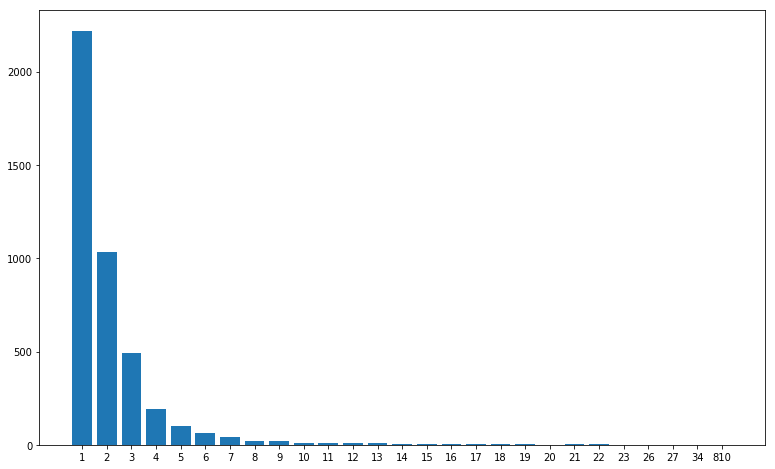

Min: 1, Max: 810, Median: 1.0, Mean: 2.317101858386262


In [3]:
plt.figure(figsize=(13, 8))
desc_counts = sorted(label_counts)
_, hist_counts = np.unique(desc_counts, return_counts=True)
desc_counts = np.unique(desc_counts)

plt.bar(range(len(desc_counts)), hist_counts, align='center')
plt.xticks(range(len(desc_counts)), desc_counts)
plt.show()

print('Min: {}, Max: {}, Median: {}, Mean: {}'.format(
    label_counts.min(), 
    label_counts.max(), 
    np.median(label_counts),
    np.mean(label_counts)))


#### View some images
Mixture of grayscale and color. Many have 3 channels but are still grayscale. Image dimensions vary greatly, but scale of fin relative to dimensions is mostly the same across images.

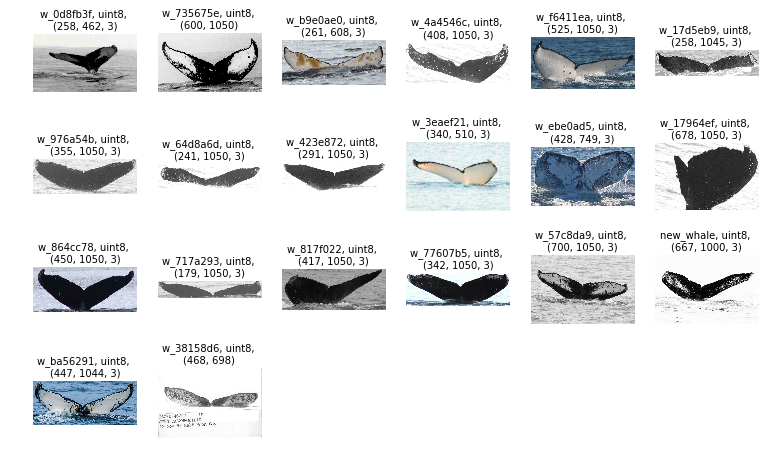

In [4]:
def plot_images(imgs, labels, rows=4, fontsize=16):
    # Set figure to 13 inches x 8 inches
    figure = plt.figure(figsize=(13, 8))
    cols = len(imgs) // rows + 1

    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols, i + 1)
        subplot.axis('Off')
        if labels:
            subplot.set_title(labels[i], fontsize=fontsize)
        plt.imshow(imgs[i], cmap='gray')
        
n_imgs = 20
data_sample = data_df.sample(n_imgs)

imgs = [imread(os.path.join(train_dir, f)) for f in data_sample.Image]
labels = ['{}, {}, \n{}'.format(ds[1].Id, img.dtype, img.shape) 
          for ds, img in zip(data_sample.iterrows(), imgs)]
plot_images(imgs, labels, rows=4, fontsize=10)